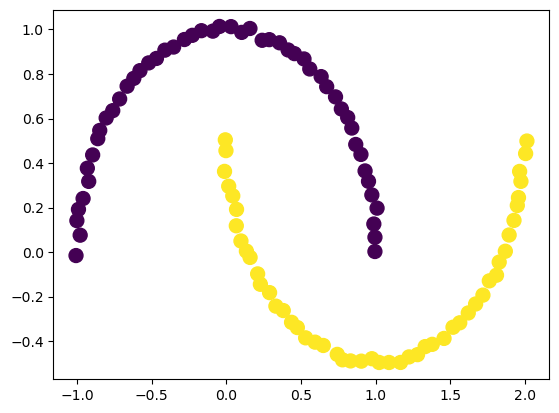

In [53]:
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
#X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X, y = make_moons(n_samples=100, noise=0.01, random_state=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)

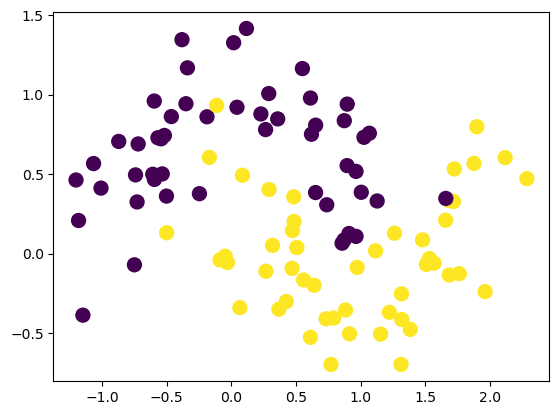

In [54]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2, max_depth=3, criterion='entropy')
model.fit(X_train, y_train)
print('학습용:', model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


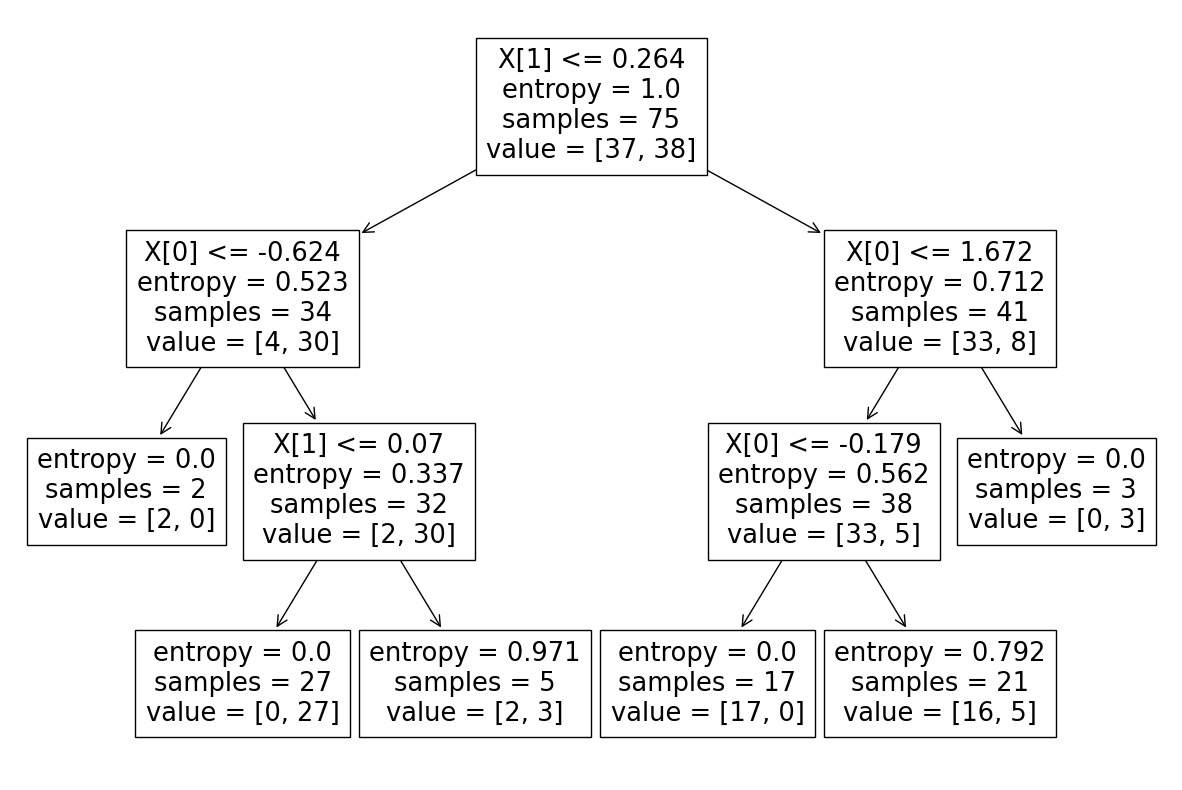

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

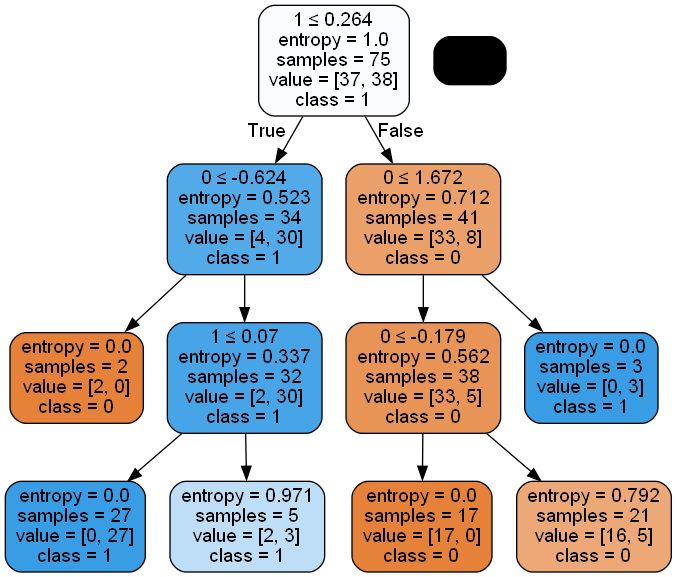

In [58]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=[0,1], 
                           class_names=['0','1'], filled=True, 
                           rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

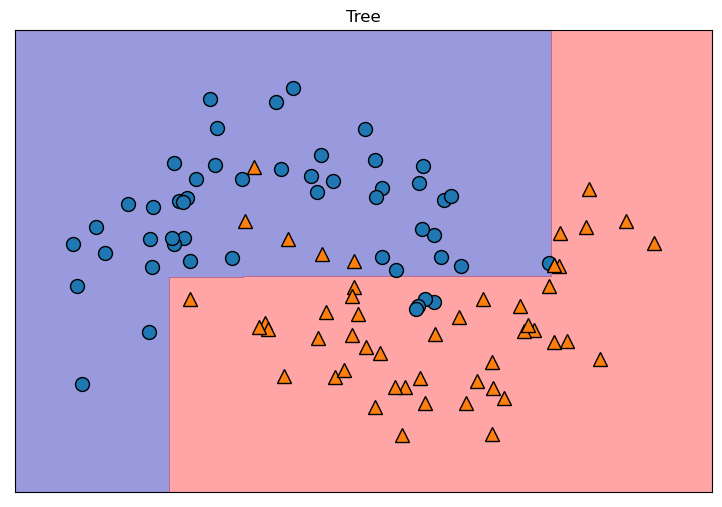

In [59]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")
#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### 엔트로피와 지니

In [60]:
#동전 던지기
from math import log2, ceil
p = 0.5
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h))

확률: 0.5
정보량: 1.0 1


In [61]:
#확률이 10%라면?
p = 0.1
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h))

확률: 0.1
정보량: 3.321928094887362 4


In [62]:
#주사위 던지기
p = 1/6
h = -log2(p)
print('확률:',p)
print('정보량:',h,ceil(h))

확률: 0.16666666666666666
정보량: 2.584962500721156 3


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'Information')

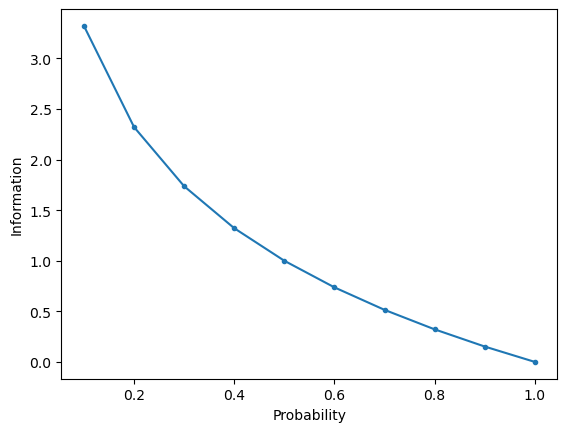

In [63]:
# 확률과 엔트로피
import numpy as np
from math import log2
from matplotlib import pyplot as plt

# 확률
probs = np.arange(0.1,1.1,0.1)
print(probs)

# 정보량 계산
info = [-log2(p) for p in probs]
plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')
# 확률이 높을수록 정보량은 감소하고 확률이 낮을수록 정보량은 증가한다.


In [64]:
#주사위 던지기의 엔트로피 계산
from math import log2
# 경우의 수
n = 6
# 확률
p = 1.0 /n
# 엔트로피 공식
entropy = -sum([p * log2(p) for _ in range(n)])
print(entropy) #비트
print(log2(2)) #2에 거듭제곱을 해서 2가 되는 수는 1
print(log2(4)) #2에 거듭제곱을 해서 4가 되는 수는 2
# print(log2(0)) #2에 거듭제곱을 해서 0이 되는 수는 없음

2.584962500721156
1.0
2.0


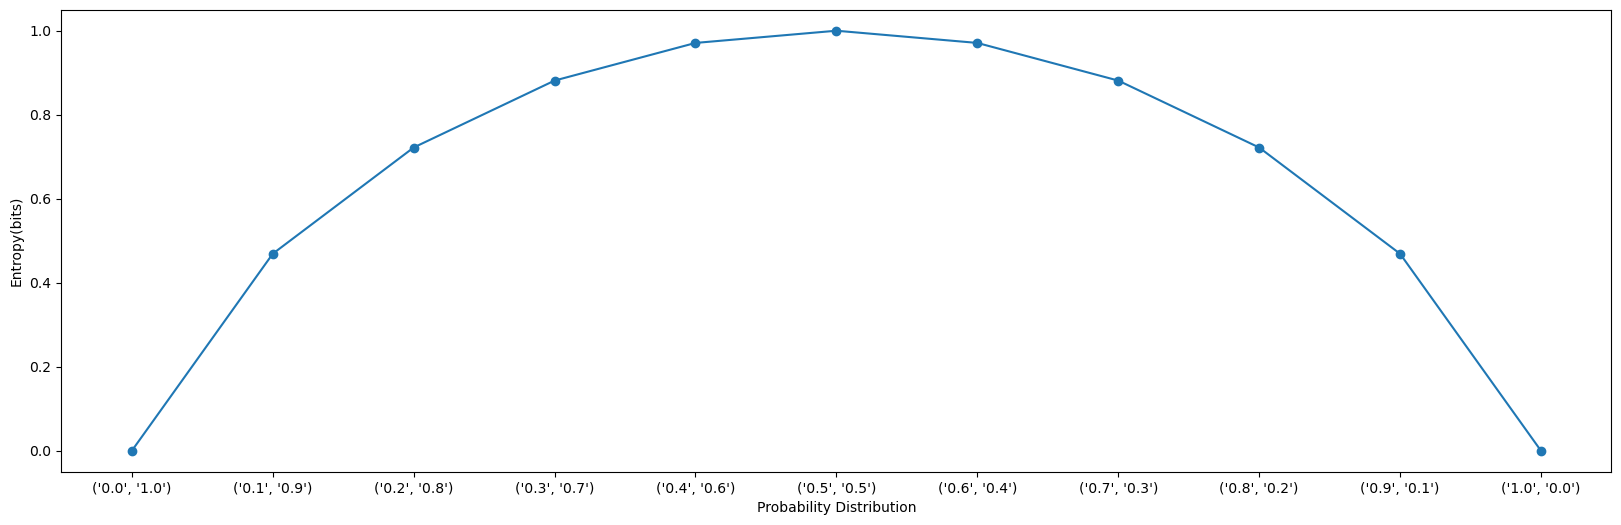

In [65]:
def entropy(events):
    return -sum([p * log2(p + 1e-15) for p in events])

# 확률
probs = np.arange(0.0, 1.1, 0.1)
# 확률 분포
dists = [[p, 1 - p] for p in probs]
# 각 분포에 대한 엔트로피 계산
ents = [entropy(d) for d in dists]
# 학률분포와 엔트로피 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd = (f'{d[0]:.1f}',f'{d[1]:.1f}')
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

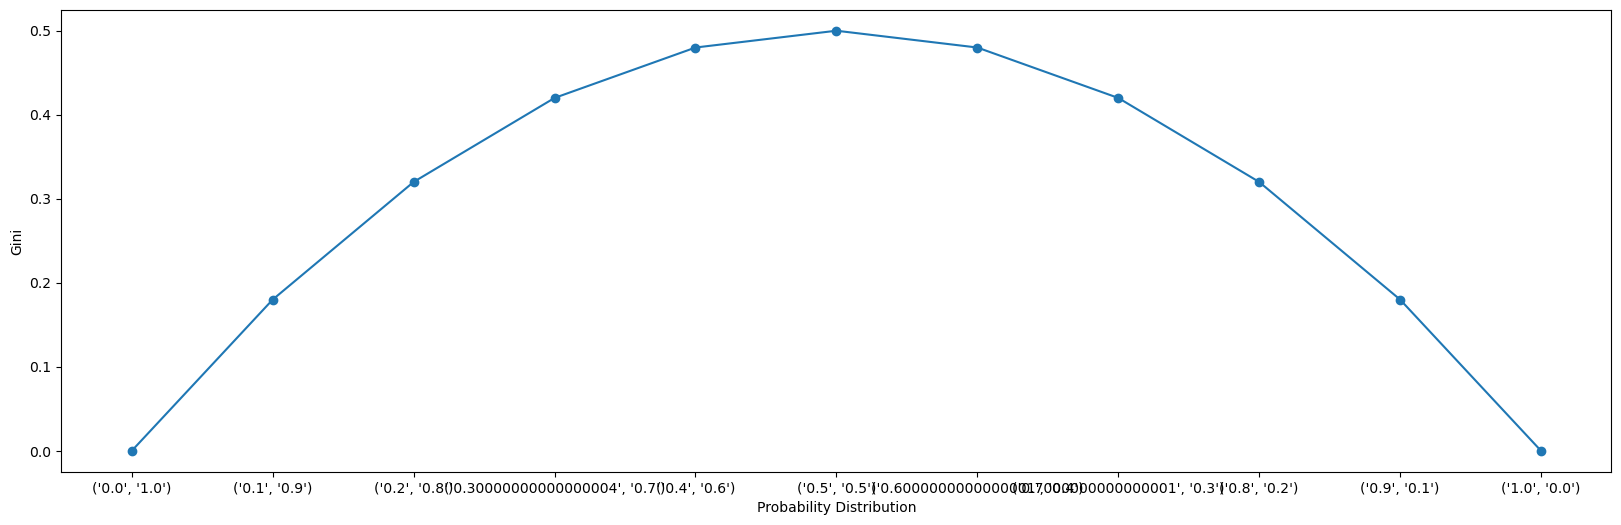

In [66]:
def gini2(events):
    return sum([p * (1 - p) for p in events])
# 확률
probs = np.arange(0.0, 1.1, 0.1)
# 확률 분포
dists = [[p, 1 - p] for p in probs]
# 각 분포에 대한 지니계수 계산
ents = [gini2(d) for d in dists]
# 확률분포와 지니계수 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd = (str(d[0]),'{:.1f}'.format(d[1]))
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Gini') #지니계수
plt.show()

#### splitter

In [67]:
import pandas as pd
df=pd.read_csv('c:/vscode/data/rides/rides2.csv')

In [68]:
df["overall"].value_counts()

1    255
0    245
Name: overall, dtype: int64

In [69]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["overall"]

In [70]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [71]:
X = X_samp[train_cols] # 독립변수
y = y_samp["overall"]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [73]:
from sklearn.tree import DecisionTreeClassifier
#트리 모형 생성(기본옵션)
model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)
model1.fit(X_train, y_train)
print("학습용:",model1.score(X_train, y_train))
print("검증용:",model1.score(X_test, y_test))

학습용: 0.8494897959183674
검증용: 0.7857142857142857


In [74]:
#무작위 분할을 선택하는 방식
model2 = DecisionTreeClassifier(splitter='random',max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용:",model2.score(X_train, y_train))
print("검증용:",model2.score(X_test, y_test))

학습용: 0.7270408163265306
검증용: 0.7244897959183674


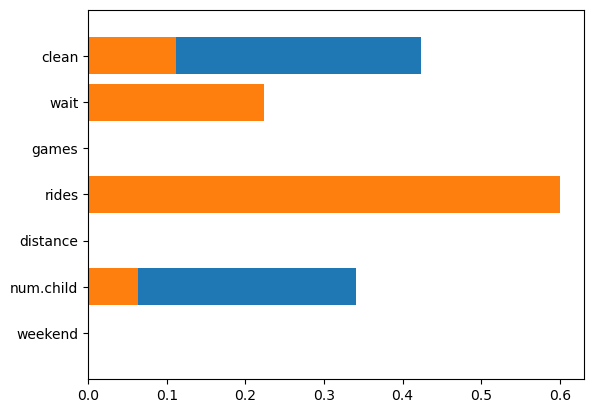

In [75]:
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.ylim(-1, n_features)
#특성 중요도
plot_tree(model1)
plot_tree(model2)

#### ccp_alpha

In [76]:
df = pd.read_csv("c:/vscode/data/customer/customer.csv")

In [77]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["Churn"]
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [78]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Churn'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [79]:
X=df2[train_cols]
y=df2['Churn']
y.value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0)

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
#가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train, y_train)
#print(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수가 증가(가지치기 양을 조정하는 옵션)
print(impurities) # 노드의 불순도

[0.         0.00129489 0.00129997 0.00131544 0.00133189 0.00137008
 0.00137075 0.00137298 0.00138122 0.00165746 0.00184162 0.00184162
 0.00184162 0.00184162 0.00184162 0.00185413 0.00207182 0.00207182
 0.00210471 0.00212231 0.00213461 0.00220994 0.0022851  0.00230203
 0.00239411 0.00241922 0.00245306 0.00248619 0.0025237  0.00254994
 0.00263089 0.00286376 0.00302402 0.00319478 0.00335892 0.00384859
 0.00411076 0.00411156 0.00591141 0.0068565  0.00928683 0.01051489
 0.01392349 0.01644238 0.01957123 0.02344153 0.06437665 0.07668733]
[0.         0.00258978 0.00518971 0.0078206  0.01048437 0.01322453
 0.01596603 0.018712   0.02009321 0.02340813 0.02524975 0.02709137
 0.02893299 0.03077461 0.03261623 0.04374099 0.04581281 0.04995646
 0.05206117 0.0605504  0.07122343 0.07343338 0.07571848 0.0780205
 0.08280872 0.08522794 0.09013406 0.09510643 0.10267754 0.10522748
 0.10785836 0.11358589 0.11660992 0.12299948 0.13643518 0.14028377
 0.14439453 0.1567292  0.16264061 0.1694971  0.17878393 0.1892

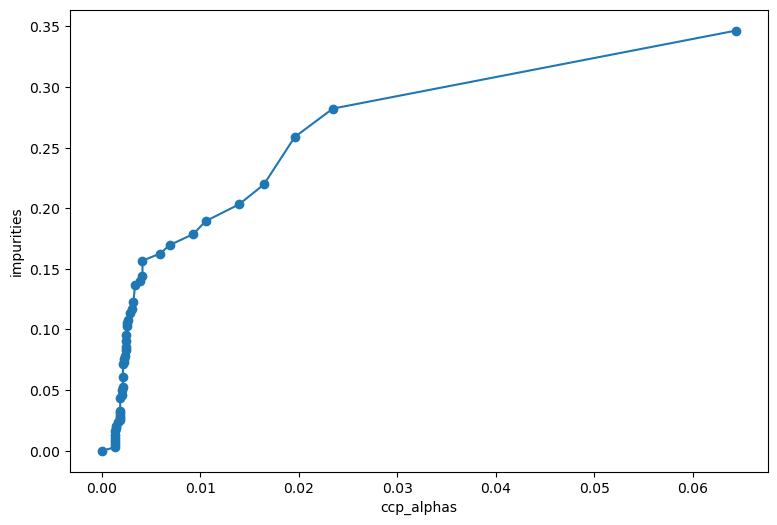

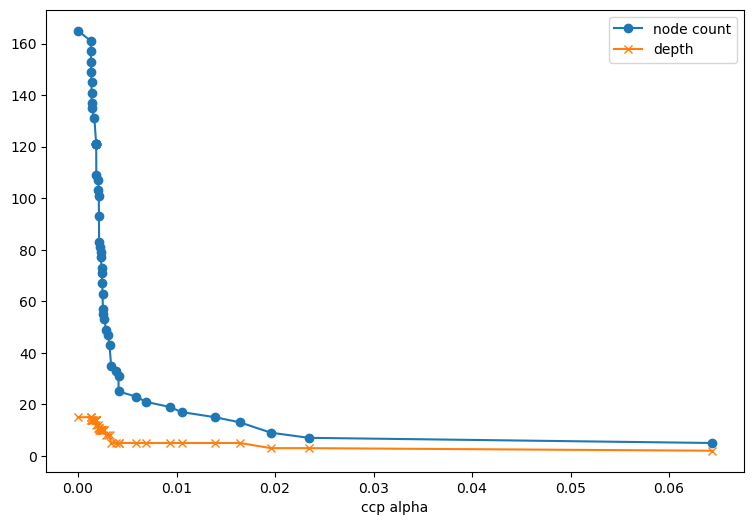

In [82]:
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("ccp_alphas")
plt.ylabel("impurities")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,
    ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker='o', label='node count')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel("ccp alpha")
plt.legend()

최고 정확도: 0.8677685950413223
최적의 alpha: 0.0033589246858478222


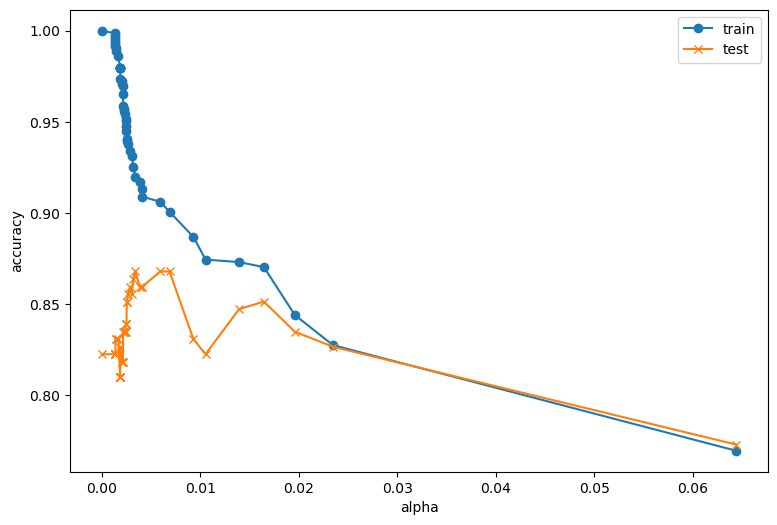

In [83]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
m=max(test_scores)
i=np.argmax(test_scores)
print('최고 정확도:',m)
print('최적의 alpha:',ccp_alphas[i])

plt.figure(figsize=(9,6))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker='o', label="train")
plt.plot(ccp_alphas, test_scores, marker='x', label="test")
plt.legend()

In [84]:
#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0)
#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
model=DecisionTreeClassifier(random_state=0, ccp_alpha=0.0033589246858478222)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.919889502762431
0.8677685950413223


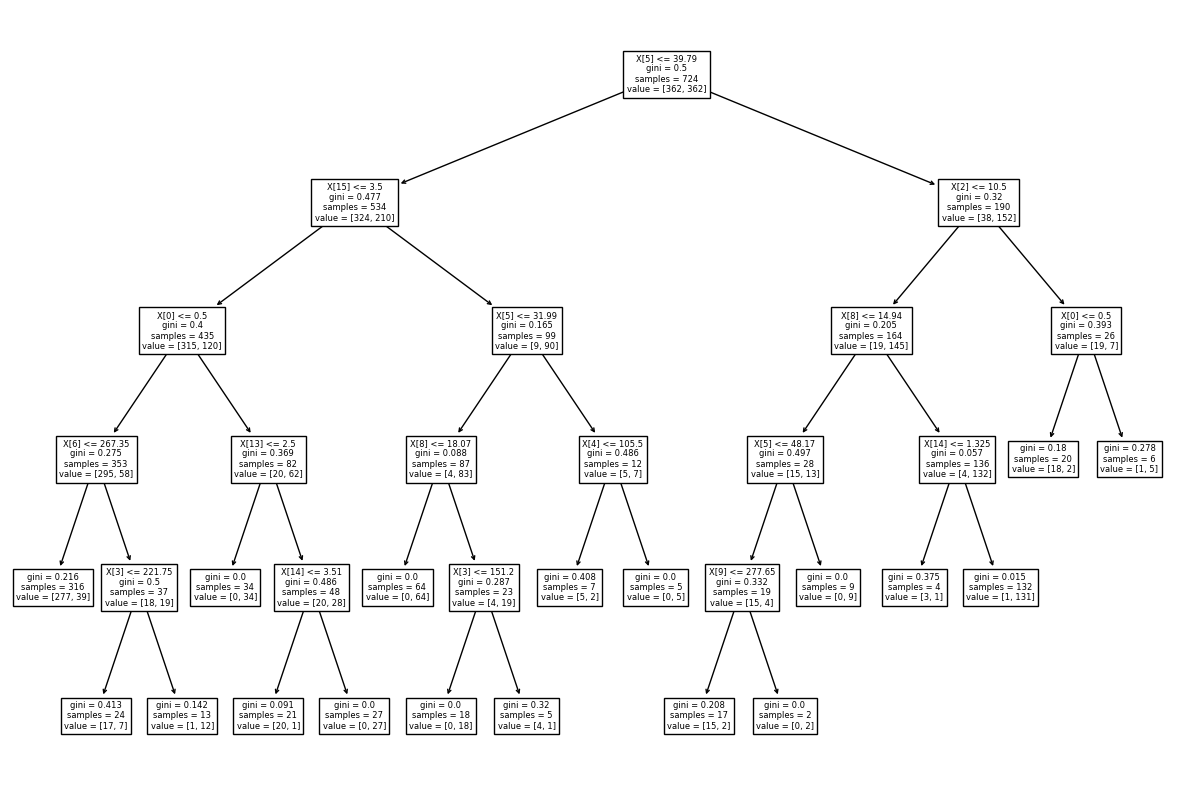

In [85]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10)) #그래프의 사이즈 설정
tree.plot_tree(model) #트리모형 그래프
plt.show()

#### max_leaf_nodes

In [86]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/pima/data.csv')

In [87]:
X = df[df.columns[0:-1]]
y = df['outcome']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [89]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

1.0
0.71875


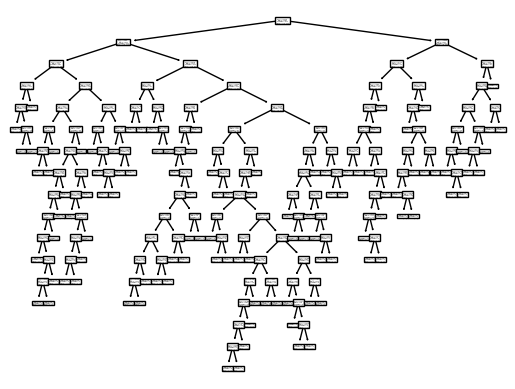

In [90]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(model1)
plt.show()

0.7482638888888888
0.75


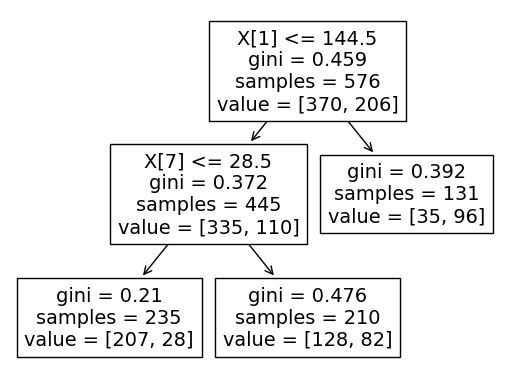

In [91]:
model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))
tree.plot_tree(model2)
plt.show()

0.7916666666666666
0.765625


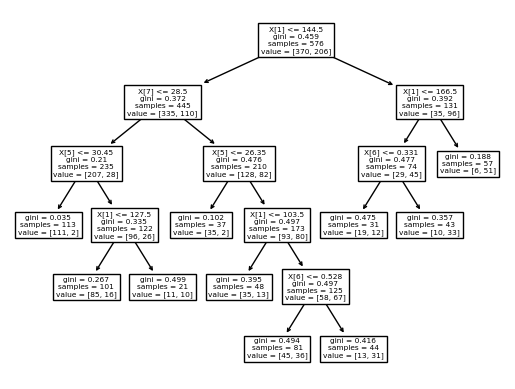

In [92]:
model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
model3.fit(X_train, y_train)
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))
tree.plot_tree(model3)
plt.show()

In [93]:
#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
from sklearn.tree import export_text

tree_rules = export_text(model2, feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 144.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- class: 0
|--- glucose >  144.50
|   |--- class: 1



In [94]:
n_nodes = model2.tree_.node_count
print('전체 노드 개수:',n_nodes)
threshold = model2.tree_.threshold
print('노드의 임계값:',threshold)

전체 노드 개수: 5
노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]


#### 민감도와 특이도

In [95]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=10)

In [96]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X,y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

In [97]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X,y)
y_hat = model.predict(X)

In [98]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=['f', 'y_hat','y'])
df.sort_values('f', ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,0.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat, labels=[0,1])

array([[8, 0],
       [0, 8]], dtype=int64)

In [100]:
fpr0 = 1 / (7+1) #0을 1로 잘못 분류한 값(특이도)
tpr0 = 7 / (1 + 7) # 1을 1로 잘 찾아낸 값(민감도, recall)
print(tpr0)
print(fpr0)

0.875
0.125


In [101]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

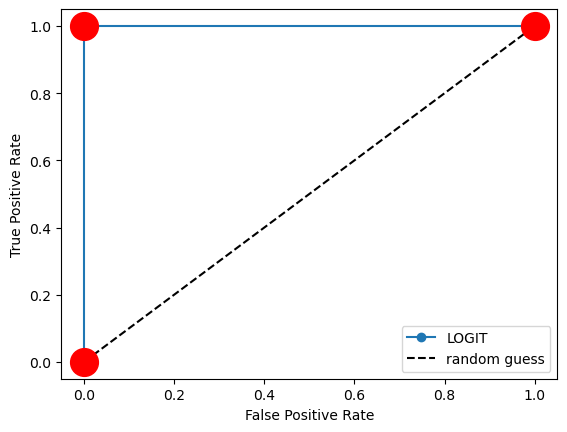

In [102]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="LOGIT")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### ROC, AUC

In [103]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/concrete/concrete.csv")

In [104]:
train_cols = [ 'cement', 'flag', 'ash', 'water','superplastic', 'coarseagg', 'findagg', 'age']

X = df[train_cols]
y = df["class"]

In [105]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    507
1    507
Name: class, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## logit
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)
print("학습용:",model1.score(X_train, y_train))
print("검증용:",model1.score(X_test, y_test))

#판별함수: 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨
model1.decision_function(X_test[:5])
model1.predict(X_test[:5])

학습용: 0.8543689320388349
검증용: 0.8106796116504854


array([0, 0, 0, 0, 1], dtype=int64)

In [107]:
## svc
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)
print("학습용:",model2.score(X_train, y_train))
print("검증용:",model2.score(X_test, y_test))

model2.decision_function(X_test[:5])
model2.predict(X_test[:5])

학습용: 0.7912621359223301
검증용: 0.7669902912621359


array([0, 0, 0, 0, 1], dtype=int64)

In [108]:
## tree
from sklearn.tree import DecisionTreeClassifier 
model3=DecisionTreeClassifier(random_state=0)
model3.fit(X_train,y_train)
print("학습용:",model3.score(X_train,y_train))
print("검증용:",model3.score(X_test,y_test))

model3.predict_proba(X_test[:5])

학습용: 0.9975728155339806
검증용: 0.9077669902912622


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

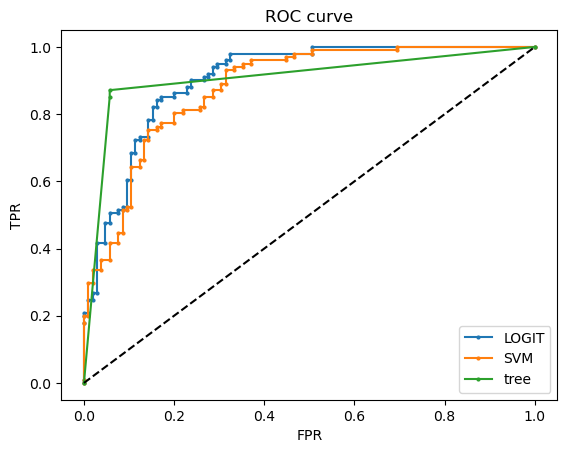

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#TPR(True Positive Rate, 민감도) - 1을 1로 잘 맞춘 비율, y축
#FPR(False Positive Rate, 특이도) - 0을 1로 틀린 비율, x축
fpr1, tpr1, thresholds1 = roc_curve(y_test,model1.decision_function(X_test))
fpr2, tpr2, thresholds1 = roc_curve(y_test,model2.decision_function(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test,model3.predict_proba(X_test)[:,1])
#면적(0.5~1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈수록) 좋은 모형
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.plot(fpr3, tpr3, 'o-', ms=2, label='tree')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [110]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

(0.9045733144743046, 0.8807166430928808, 0.9065063649222064)

#### 다중클래스의 ROC

In [111]:
df = pd.read_csv("c:/vscode/data/iris/iris.csv")

In [112]:
X=df[df.columns[:-2]]
y=df['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score = model.decision_function(X)
print(y_score[::20])
print(model.predict(X[::20]))

from sklearn.metrics import confusion_matrix
y_hat=model.predict(X_test)
confusion_matrix(y_test, y_hat)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

[[ 6.70059602  2.86773734 -9.56833337]
 [ 5.79276224  2.99448097 -8.78724321]
 [ 6.87206743  2.75071276 -9.62278019]
 [-0.29932975  2.47880777 -2.17947802]
 [-0.95183301  2.43440741 -1.4825744 ]
 [-7.05890235  1.09066247  5.96823987]
 [-6.47727399  1.5488002   4.92847378]
 [-6.35356265  1.42564797  4.92791469]]
[0 0 0 1 1 2 2 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [113]:
#roc_curve() 함수는 이진분류에만 지원됨
#각각의 클래스에 대해 별도로 ROC Curve를 그려야 함
#y변수를 원핫인코딩한 리스트

from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2])
y[::20]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0)

{0: 1.0, 1: 0.475, 2: 1.0}


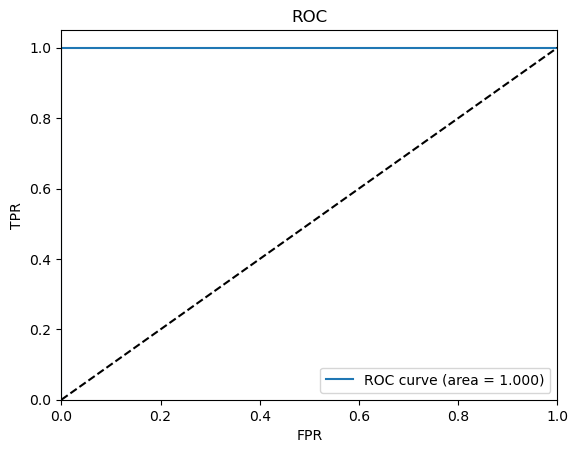

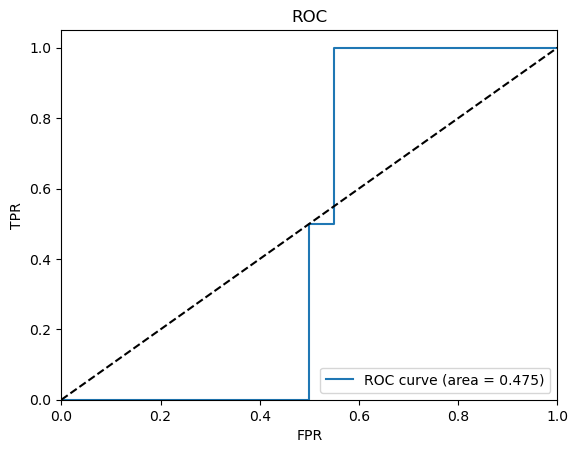

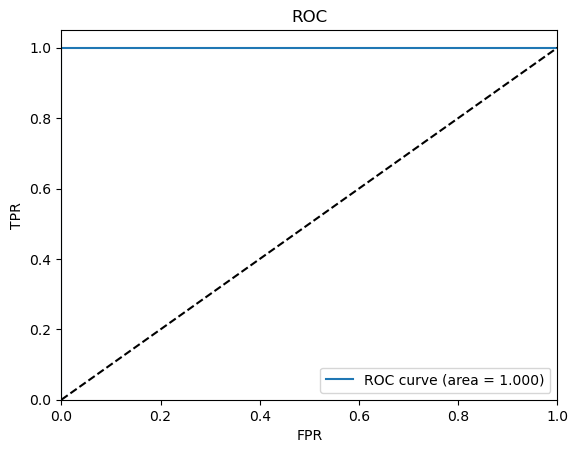

In [116]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.decision_function(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f)' %
    roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

#### min_samples_split

In [117]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/pima/data.csv")

In [118]:
X=df[df.columns[:-1]]
y=df['outcome']

In [121]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

scoring = {'AUC': 'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=10),
        param_grid={'min_samples_split': range(2, 403, 10)},
        scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
print(results['mean_test_AUC'])
print(results['mean_test_Accuracy'])
print(gs.best_params_) #최적의 파라미터

[0.68731656 0.7374724  0.76586932 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.72146677 0.72669553 0.7214413  0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]
{'min_samples_split': 142}


142.0
92.0


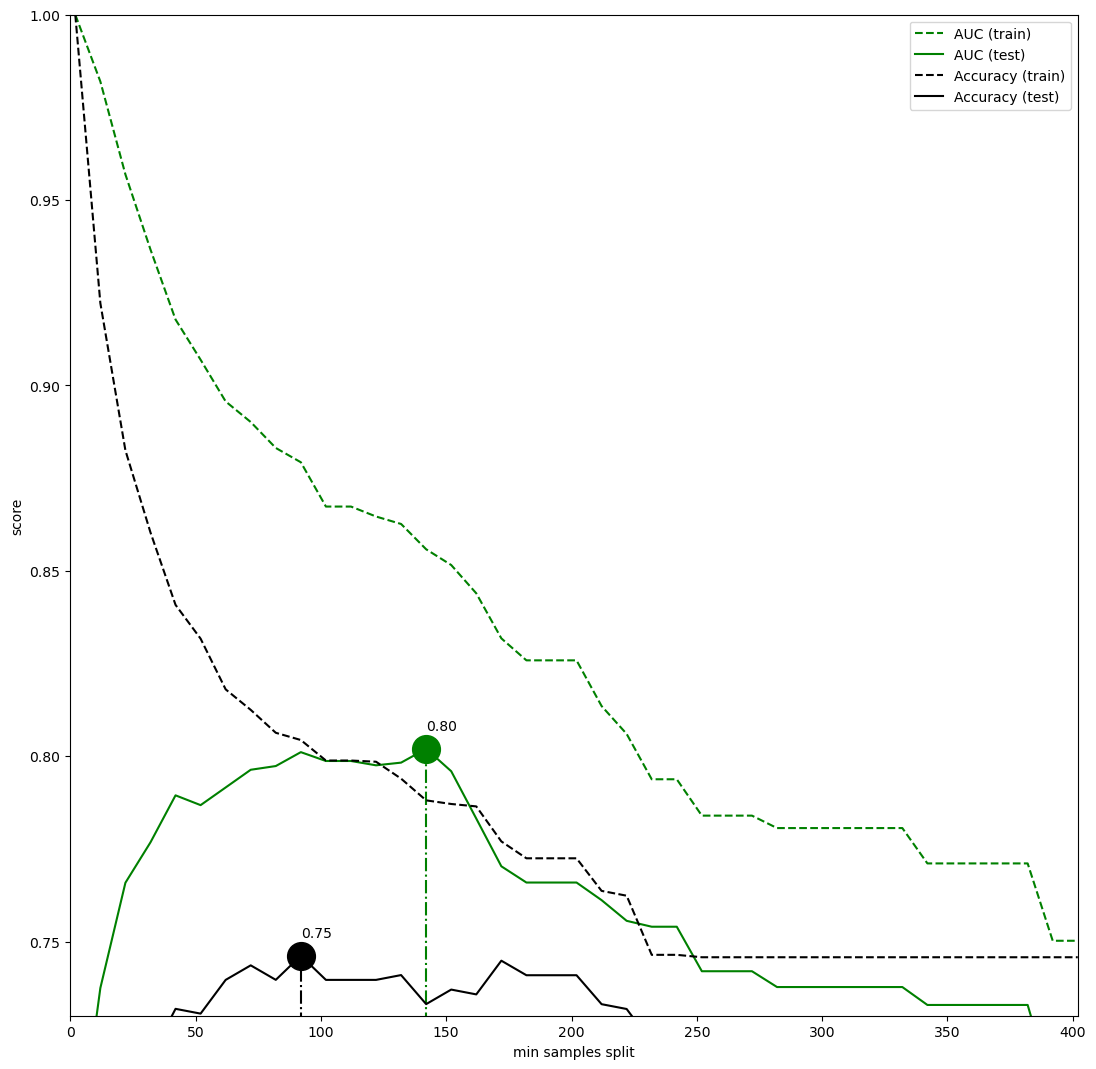

In [123]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(13, 13))
plt.xlabel("min samples split")
plt.ylabel("score")
ax = plt.gca() #current axes 반환
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)
#min_samples_split의 값
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        ax.plot(X_axis, sample_score_mean, style, color=color,
                label="%s (%s)" % (scorer, sample))
    best_index=np.argmax(results['mean_test_%s' % scorer])
    best_score=results['mean_test_%s' % scorer][best_index]
    # 최고 점수에 수직선 표시
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='o', ms=20)
    # 최고 점수 표시
    ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))
    print(X_axis[best_index])
plt.legend()
plt.show()

#### 회귀트리

In [124]:
df = pd.read_csv('c:/vscode/data/ram/ram_price.csv')

Text(0, 0.5, 'price ($/Mbyte)')

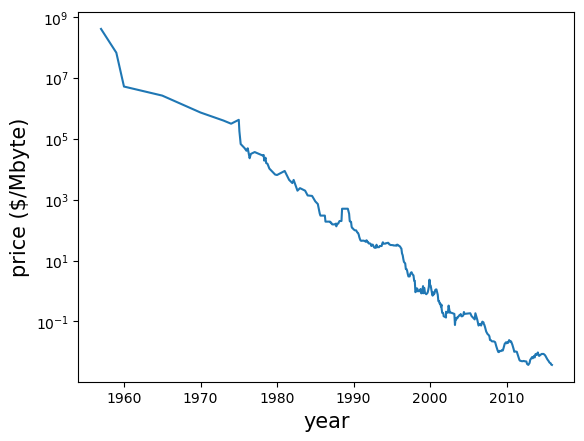

In [125]:
#y축 로그 스케일
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
# x축 날짜, y축 램 가격
#시간이 지날수록 램 가격은 점차 하락하고 있음

In [126]:
#학습용과 검증용 구분(2000년 이전과 이후로 구분)
X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]
#기계학습모형에는 2차원 형태의 데이터가 입력되어야 함
X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환
# y값을 로그 스케일로 변환
y_train = np.log(X_train0['price'])

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12868\2391060383.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환


In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train) #선형회귀모형
svr = SVR(kernel='linear').fit(X_train, y_train)

In [131]:
#전체 기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기
pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기
pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr)

Text(0, 0.5, 'price ($/Mbyte)')

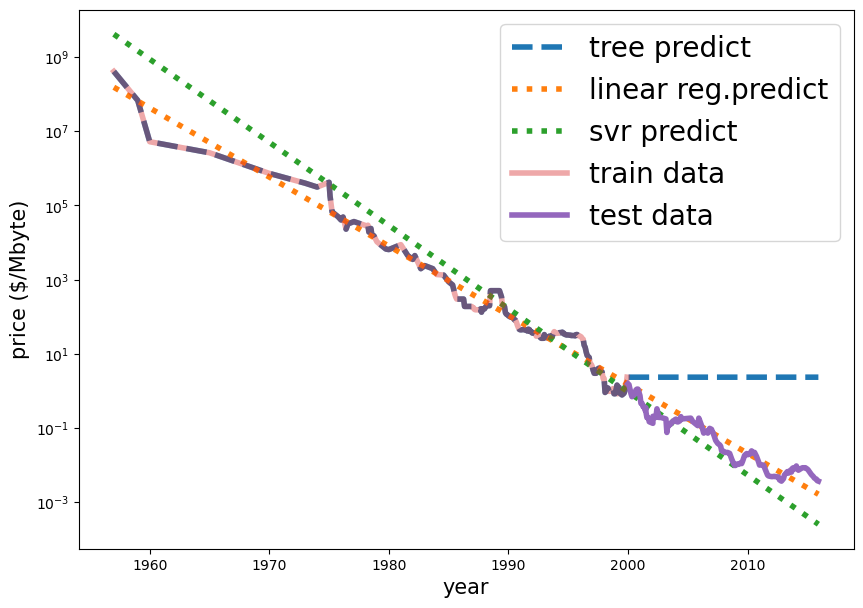

In [132]:
#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교
plt.figure(figsize=(10,7))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg.predict', lw='4', ls=':')
plt.semilogy(df['date'], price_svr, label='svr predict', lw='4', ls=':')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

#### 모형결합(다수결)

In [135]:
df = pd.read_csv("c:/vscode/data/creditcard.csv")

In [136]:
train_cols = df.columns[1:-1]

X = df[train_cols] # 독립변수
y = df["Class"]

In [137]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [138]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=10)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1, max_iter=1000)
model2 = DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(n_neighbors=2)

ensemble = VotingClassifier(estimators=[('lr', model1),
            ('tree', model2), ('knn', model3)], voting='soft')

for model in (model1, model2, model3, ensemble):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

LogisticRegression(max_iter=1000, random_state=1)
학습용: 0.9529860228716646
검증용: 0.9289340101522843

DecisionTreeClassifier(random_state=1)
학습용: 1.0
검증용: 0.9289340101522843

KNeighborsClassifier(n_neighbors=2)
학습용: 0.9428208386277002
검증용: 0.9289340101522843

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=1)),
                             ('tree', DecisionTreeClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=2))],
                 voting='soft')


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

학습용: 1.0
검증용: 0.9441624365482234



#### 모형결합(배깅)

In [141]:
df = pd.read_csv("c:/vscode/data/customer/customer.csv")

In [142]:
train_cols = df.columns[0:16]
X = df[train_cols] # 독립변수
y = df["Churn"]

In [144]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Churn"].value_counts()

X = df_samp[train_cols] # 독립변수
y = df_samp["Churn"]

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model1=DecisionTreeClassifier(random_state=0)
model2=SVC(kernel='linear')
model3=BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0)
model4=BaggingClassifier(KNeighborsClassifier(n_neighbors=2), n_estimators=10, random_state=0)
model5=BaggingClassifier(SVC(kernel='linear'), n_estimators=10, random_state=0)

for model in (model1, model2, model3, model4, model5):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6597938144329897

SVC(kernel='linear')
학습용: 0.7577720207253886
검증용: 0.7268041237113402

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)
학습용: 1.0
검증용: 0.7268041237113402

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=2),
                  random_state=0)
학습용: 0.8808290155440415
검증용: 0.5979381443298969

BaggingClassifier(base_estimator=SVC(kernel='linear'), random_state=0)
학습용: 0.7694300518134715
검증용: 0.7164948453608248



#### 모형결합(랜덤포레스트)

In [150]:
df = pd.read_csv("c:/vscode/data/customer/customer.csv")

In [152]:
train_cols = df.columns[0:13]
X = df[train_cols] # 독립변수
y = df["Churn"]

from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

X = df_samp[train_cols] # 독립변수
y = df_samp["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

model1 = DecisionTreeClassifier(random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)

for model in (model1, model2, model3):
    print(model)
    model.fit(X_train,y_train)
    print("학습용:",model.score(X_train, y_train))
    print("검증용:",model.score(X_test, y_test))
    print()

DecisionTreeClassifier(random_state=0)
학습용: 1.0
검증용: 0.6597938144329897

RandomForestClassifier(random_state=0)
학습용: 1.0
검증용: 0.7164948453608248

ExtraTreesClassifier(random_state=0)
학습용: 1.0
검증용: 0.7216494845360825



DecisionTreeClassifier(random_state=0)


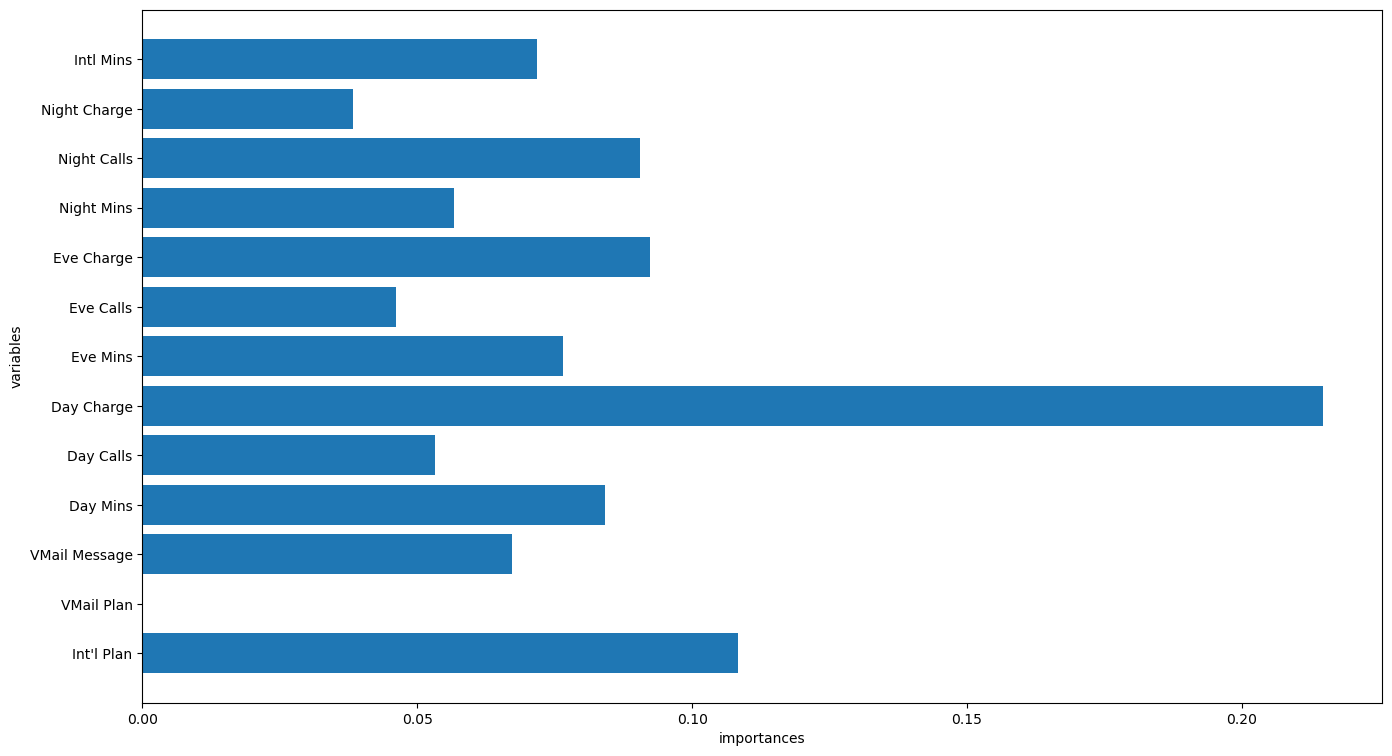

RandomForestClassifier(random_state=0)


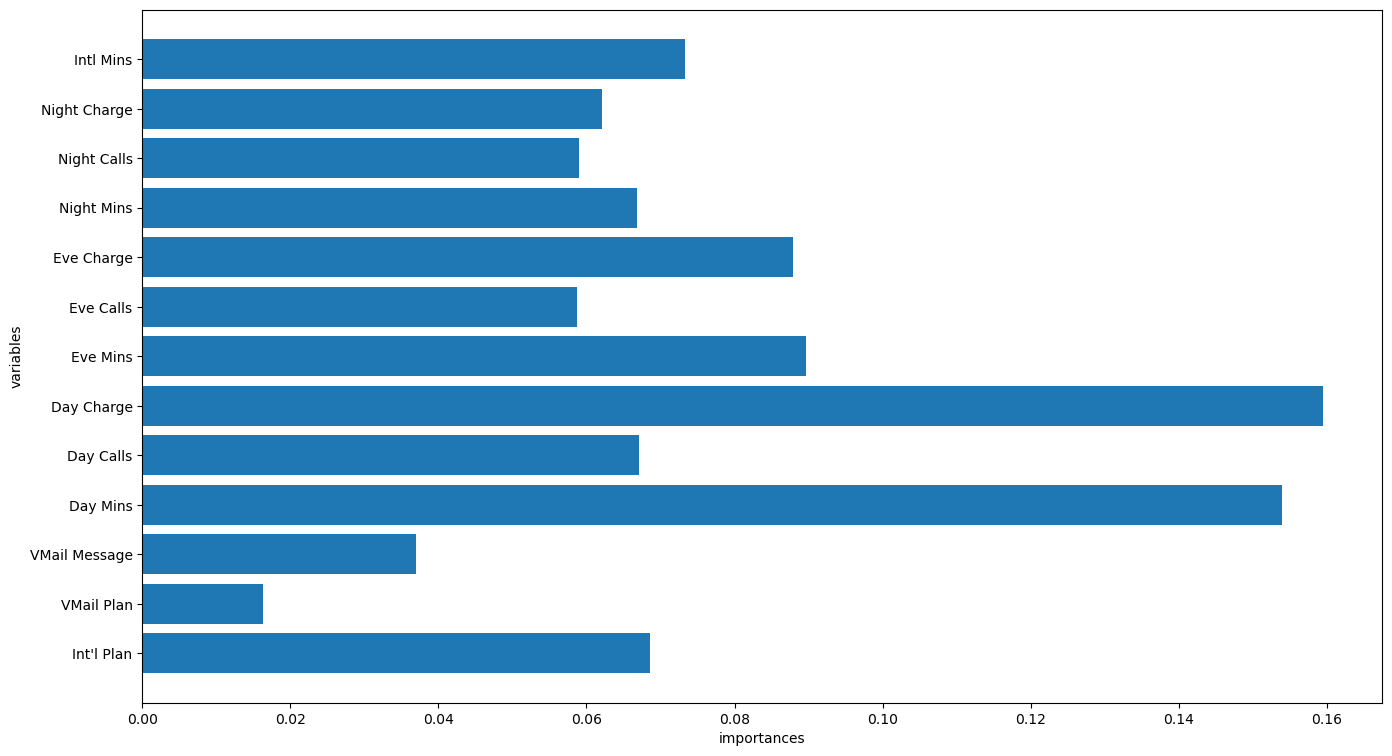

ExtraTreesClassifier(random_state=0)


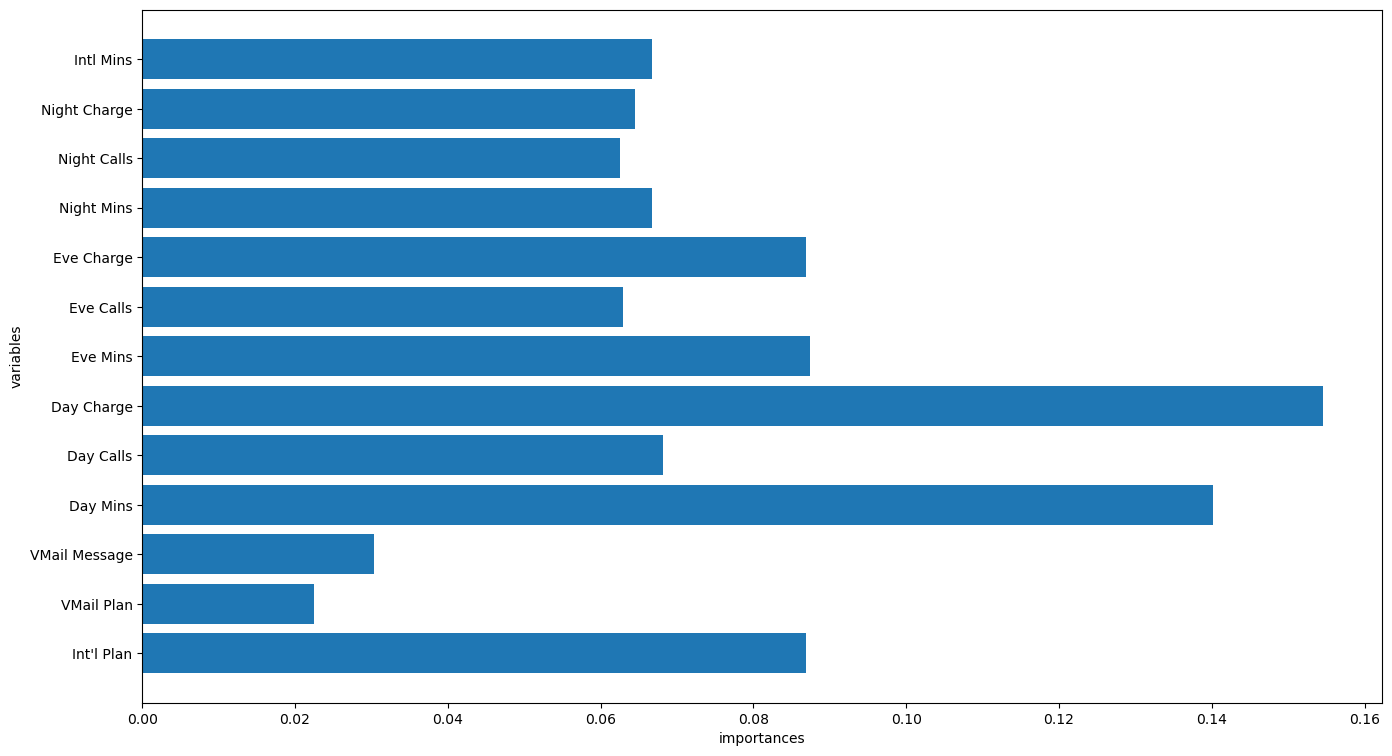

In [161]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("variables")
    plt.ylim(-1, n_features)

for model in (model1, model2, model3):
    print(model)
    plot_tree(model)
    plt.show()